## Step 1 - Importing Required Libraries and Packages

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\viraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2 - Reading the data

In [2]:
air_tweets=pd.read_csv('D:\\SDBI\\SEM5\\ML\\Tweets.csv',header=0,error_bad_lines=False)
air_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
air_tweets= air_tweets[['text','airline_sentiment']]
air_tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [5]:
air_tweets.columns=['comment','sentiment']

In [6]:
#Removing null data 
air_tweets=air_tweets.dropna()
air_tweets = air_tweets.reset_index(drop=True)
air_tweets

,comment,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


In [7]:
air_tweets['sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

## Step 3 - Preprocessing the text data

#### 1. Converting the comments into lower cases  

In [9]:
air_tweets['pre_process'] = air_tweets['comment'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

#### 2. Removing all the HTML tags and URLs from the comments.

In [10]:
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x: re.sub(r'http\S+', '', x))

#### 4. Removing all non-alpha characters or special charcaters from the comments

In [11]:
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

#### 5. Removing stopwords

In [14]:
stop = stopwords.words('english')
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

#### 6. Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\viraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 7. Removing all the unwanted extra spaces between words in the comments

In [16]:
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

In [17]:
air_tweets.head()

,comment,sentiment,pre_process
0,@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,virginamerica plus added commercial experience...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,virginamerica nt today must mean need take ano...
3,@VirginAmerica it's really aggressive to blast...,negative,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,virginamerica really big bad thing


#### 8. Performing Contractions on the comments.
#Example: 
    
    won’t -- will not
    would't"-- "would not

In [18]:
def contractions(s):
    s = re.sub(r"won't", "will not",s)
    s = re.sub(r"would't", "would not",s)
    s = re.sub(r"could't", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s= re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
air_tweets['pre_process']=air_tweets['pre_process'].apply(lambda x:contractions(x))

## Step 4 - Wordcloud

In [38]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
text = " ".join(data for data in air_tweets.pre_process)
print ("There are {} words in the combination of all data.".format(len(text)))

There are 997780 words in the combination of all data.


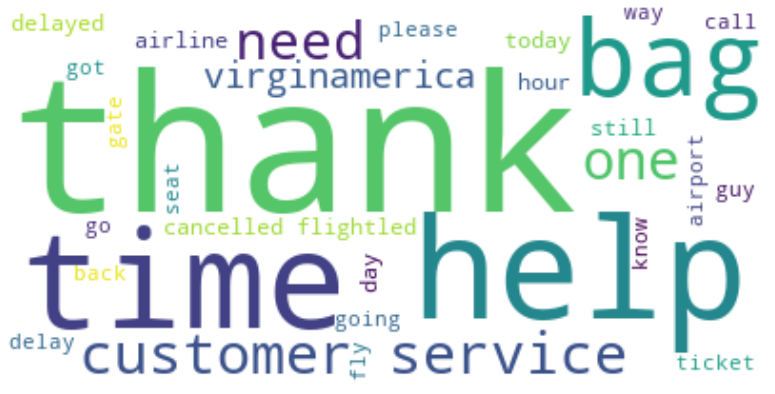

In [116]:
# Create stopword list:
stopwords = set(STOPWORDS)
#taking out common words specific to airlines
common_words=["usairways", "united", "southwestair", "flight", "americaair","americanair","jetblue","plane",'n',"nt",'t','u','ca']
stopwords.update(common_words)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=30).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Top 5 words

Thank
time
help
bag
customer/service

## Step 5 - Splitting the Data into Testing and Training sets

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(air_tweets['pre_process'], air_tweets['sentiment'], test_size=0.25, random_state=30)

## Step 6 - Feature extraction using TF-IDF vectorizer

In [20]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


## Step 7 - Building ML models to predict the sentiments for the test set 

In [21]:
##### using SVM algorithm
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [22]:
###Fitting the Training data into model

In [23]:
clf.fit(tf_x_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [24]:
###Predicting the Test data

In [25]:
y_test_pred=clf.predict(tf_x_test)

In [26]:
#Analyzing the results

In [27]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred)

In [28]:
print(report)

              precision    recall  f1-score   support

    negative       0.84      0.91      0.87      2307
     neutral       0.64      0.54      0.59       777
    positive       0.75      0.63      0.69       576

    accuracy                           0.79      3660
   macro avg       0.74      0.70      0.72      3660
weighted avg       0.78      0.79      0.78      3660

